In [88]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader , random_split
from torchvision.models import mobilenet_v3_large

# speed up 
from torch.cuda.amp import GradScaler , autocast
import numpy as np

from rich import print
from tqdm import tqdm
import os
from time import time

In [89]:
device = torch.device( "cpu") # "cuda" if torch.cuda.is_available() else
device

device(type='cpu')

In [90]:
transform_test = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [91]:
import os 

folder_name = os.listdir("./data")
folder_name

['BOO', 'HOT']

In [92]:
from PIL import Image
import random as rd

In [93]:
def to_model_input_format(image ,transform):
        img_tensor = transform(image)
        img_tensor = img_tensor[np.newaxis, :]
        return img_tensor

def random_simple_test_case(folder_path:str , number:int=10):
    assert os.path.exists(folder_path)
    
    
    
    image_paths = [os.path.join(folder_path , item) for item in os.listdir(folder_path)]
    image_paths_rd = rd.sample(image_paths , k=number)
    image_lists = [Image.open(path) for path in image_paths_rd]
#     image_lists = [to_model_input_format(image , transform) for image in image_lists]
    
    return image_lists

In [94]:
boo_images = random_simple_test_case("./data/BOO" )
boo_images

[<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x1200>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1080x1080>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=2731x4096>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1440x1800>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1200x1669>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=860x1376>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x1200>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1200x800>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1130x1514>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1440x1800>]

In [95]:
hot_images = random_simple_test_case("./data/HOT" )
hot_images

[<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1045x1307>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1080x941>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1732x2294>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1440x1800>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=750x1092>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=2730x4096>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=953x1118>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=394x559>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=577x790>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=2924x4096>]

In [96]:
model = mobilenet_v3_large()

num_features = model.classifier[-1].in_features
# output only two class 
model.classifier[-1] = nn.Linear(num_features , 5)

model.load_state_dict(torch.load("./model\mobileNet_v3_v8_28_BOTH.pth" , map_location="cpu"))
model.eval()

# model = model.to(device)

MobileNetV3(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
      (2): Hardswish()
    )
    (1): InvertedResidual(
      (block): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=16, bias=False)
          (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
          (2): ReLU(inplace=True)
        )
        (1): Conv2dNormActivation(
          (0): Conv2d(16, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
        )
      )
    )
    (2): InvertedResidual(
      (block): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(16, 64, kernel_size=(1, 1), stride=(1, 1), bi

In [97]:
from collections import Counter

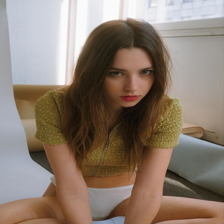

Model prediction 3

========================================================

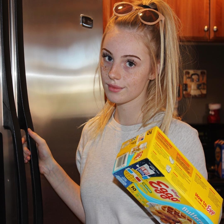

Model prediction 3

========================================================

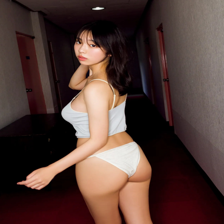

Model prediction 3

========================================================

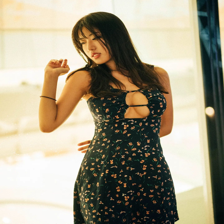

Model prediction 3

========================================================

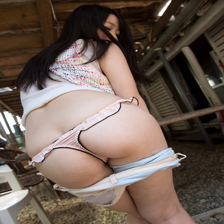

Model prediction 3

========================================================

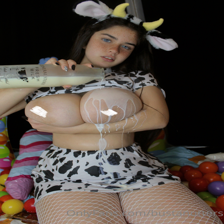

Model prediction 3

========================================================

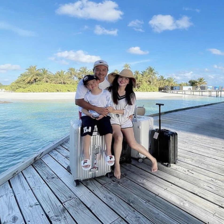

Model prediction 3

========================================================

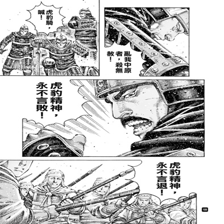

Model prediction 3

========================================================

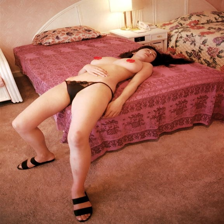

Model prediction 3

========================================================

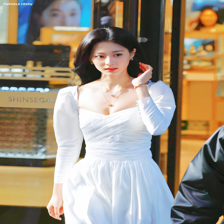

Model prediction 3

========================================================

Counter({3: 10})

acc : 0.0

In [98]:
result = []
for image in hot_images:
    display(image.resize((224,224)))
    
    img_tensor = to_model_input_format(image , transform_test)
    # img_tensor = img_tensor.to(device)
    
    pred_prob = model(img_tensor)
    pred = torch.max(pred_prob,1).indices
    pred = pred.item()
    
    
    print(f"Model prediction {pred}")

    print("========================================================")
    result.append(pred)
c = Counter(result)
print(c)
print(f"acc : {c[1] / len(hot_images)}")

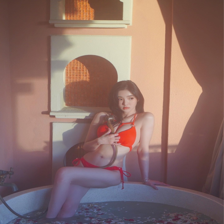

Model prediction 3

========================================================

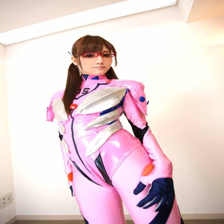

Model prediction 0

========================================================

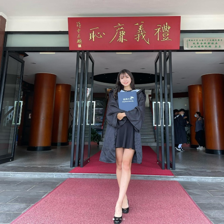

Model prediction 2

========================================================

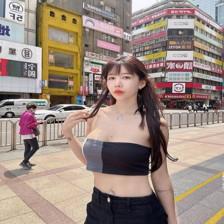

Model prediction 3

========================================================

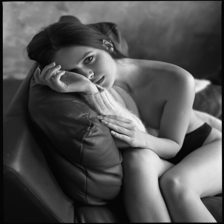

Model prediction 4

========================================================

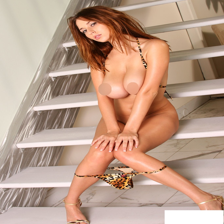

Model prediction 2

========================================================

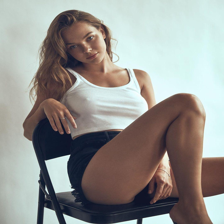

Model prediction 2

========================================================

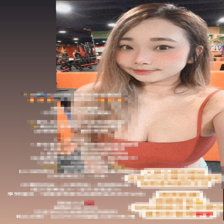

Model prediction 0

========================================================

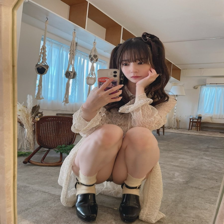

Model prediction 0

========================================================

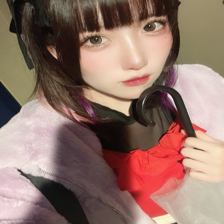

Model prediction 3

========================================================

Counter({3: 3, 0: 3, 2: 3, 4: 1})

acc: 0.3

In [86]:
result = []
for image in boo_images:
    display(image.resize((224,224)))
    
    img_tensor = to_model_input_format(image , transform_test)
    # img_tensor = img_tensor.to(device)
    
    pred_prob = model(img_tensor)
    pred = torch.max(pred_prob,1).indices
    pred = pred.item()
    
    
    print(f"Model prediction {pred}")

    print("========================================================")
    result.append(pred)
    
c = Counter(result)
print(c)
print(f"acc: {c[0] / len(boo_images)}")

In [87]:
from sklearn.metrics import f1_score